# Machine Learning Models

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [169]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [170]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [171]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [172]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV

In [173]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [174]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

In [175]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


Load raw datas

In [176]:
### refresh ds
def reload():
    return pd.read_csv("./data/DE_2013p_EUSILC.csv")


    #return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [177]:
data= reload()
data=data.dropna(thresh=len(data)*0.8, axis=1)

data.head()

,PB010,PB020,PB030,PB040,PB100,PB110,PB120,PB140,PB150,PB190,...,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220
0,2013,DE,35601,3057.583187,2,2013,45,1977,1,2.0,...,3.0,6.0,10.0,8.0,2.0,1.0,NaN,7.0,8.0,NaN
1,2013,DE,44701,3057.583187,3,2013,15,1936,1,2.0,...,7.0,4.0,99.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,2013,DE,59901,3057.583187,2,2013,45,1952,2,2.0,...,3.0,8.0,9.0,10.0,1.0,1.0,NaN,10.0,6.0,2.0
3,2013,DE,71101,3057.583187,2,2013,15,1938,2,2.0,...,5.0,7.0,5.0,8.0,1.0,NaN,6.0,9.0,5.0,3.0
4,2013,DE,79501,3057.583187,2,2013,25,1950,2,5.0,...,0.0,2.0,NaN,2.0,1.0,NaN,5.0,2.0,10.0,1.0


In [178]:
### drop columns because not of interest 

columnstodrop=['PB040', 'PB100',
               'PB110','PB120', 'PB020', "PB220A"]

data.drop(columnstodrop, axis=1, inplace=True)

In [179]:
data.dropna(inplace=True)
### drop to many?

Define X and y

In [180]:
"""
## use raw data
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 'PW010: OVERALL LIFE SATISFACTION'
XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]
"""

"\n## use raw data\nXCol=list(data.columns) ## take all otherwise: columns\noutcomelist = 'PW010' ## 'PW010: OVERALL LIFE SATISFACTION'\nXCol.remove(outcomelist)\nYCol=outcomelist\nX = data[XCol]\ny= data[YCol]\n"

PCA /ICA

In [181]:
### use cleanded
data = ds
XCol= columns #
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]

In [182]:
data['PB140: YEAR OF BIRTH']=data['PB140: YEAR OF BIRTH'].apply(lambda x: 2020-x)


In [183]:
data[XCol].head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,43,1,2.0,3,0,2,3.0,1.0,2,52.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,84,1,2.0,1,0,2,2.0,7.0,1,62.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,68,2,2.0,3,0,1,5.0,11.0,2,23.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,82,2,2.0,3,0,2,2.0,7.0,1,51.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,70,2,5.0,3,0,2,3.0,1.0,1,44.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [184]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components="mle", whiten=True, svd_solver='full')
transformer = FastICA(n_components=7,random_state=0)

# Conduct PCA
features_pca = pca.fit_transform(X)
features_ica =  transformer.fit_transform(X)


In [185]:
features_ica.shape

(19463, 7)

In [186]:
data=pd.DataFrame(features_ica)
data.describe()

,0,1,2,3,4,5,6
count,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04
mean,-8.442238e-18,4.406229e-17,-7.059040e-20,-3.167711e-19,1.863266e-17,2.523557e-19,-1.457616e-17
std,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03
min,-1.492278e-02,-2.219250e-02,-1.151247e-02,-6.066908e-04,-1.503075e-01,-3.282613e-03,-4.446149e-02
25%,-4.867294e-03,-6.258929e-03,-5.375307e-03,-4.881013e-04,-8.190526e-04,-3.163062e-03,-2.986116e-03
50%,-1.466615e-03,-5.551411e-04,-2.827963e-03,-4.031143e-04,1.277355e-03,-3.039595e-03,1.350294e-03
75%,4.314570e-03,6.217341e-03,5.375456e-03,-3.374857e-04,3.554372e-03,7.488951e-04,4.000223e-03
max,1.909461e-02,1.428118e-02,1.505049e-02,5.034432e-01,1.103122e-02,3.330572e-01,1.193757e-02


In [187]:
datpa=pd.DataFrame(features_pca)
datpa.describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,...,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04
mean,-3.241568e-16,-7.565651e-17,-1.213691e-17,-1.344605e-18,-4.788454e-16,-7.085176e-15,-2.150226e-17,-1.086408e-16,-1.403252e-17,1.324419e-16,...,1.638724e-16,-6.957504e-17,2.956069e-16,2.759286e-16,-1.907624e-16,-1.586929e-16,-1.142837e-16,9.293405e-17,2.981296e-16,3.521249e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.964832e+00,-9.306241e-01,-1.423415e+00,-9.227472e-02,-2.394807e+00,-2.565819e+00,-1.534324e+00,-1.916694e+00,-2.194439e+00,-1.985390e+00,...,-9.744286e-01,-2.165889e+00,-2.115689e+00,-7.739913e-01,-1.341694e+00,-9.102163e-01,-6.019898e-01,-2.344854e+00,-1.572899e+00,-4.625990e-01
25%,-7.131660e-01,-6.400480e-01,-4.408457e-01,-8.743737e-02,-5.045373e-01,-7.511379e-01,-7.506569e-01,-8.062937e-01,-6.103556e-01,-7.284562e-01,...,-7.876100e-01,-9.439097e-01,-8.627968e-01,-3.770494e-01,-5.779003e-01,-5.207266e-01,-3.291940e-01,-4.066425e-01,-4.688027e-01,-2.766800e-01
50%,-4.291571e-01,-2.279236e-01,-4.162489e-01,-7.016229e-02,2.495426e-01,-8.283605e-02,-3.939529e-01,-2.196105e-01,-1.330766e-01,-3.079454e-01,...,-6.655354e-01,2.423249e-01,-3.286381e-01,-2.142832e-01,-4.869560e-01,-4.460302e-01,-2.543947e-01,-3.519362e-01,-2.490030e-01,-2.373290e-01
75%,5.915674e-01,2.854243e-01,1.034547e-01,-3.619530e-02,6.664302e-01,7.686659e-01,7.451892e-01,7.470607e-01,4.990422e-01,4.668119e-01,...,1.267316e+00,8.995661e-01,9.737394e-01,-6.275933e-02,-3.531081e-01,-3.148830e-01,-1.341181e-01,-2.856906e-01,-4.158828e-02,-1.956186e-01
max,5.660268e+00,1.864953e+01,4.645856e+01,7.021641e+01,2.644110e+00,9.495413e+00,2.084891e+00,3.204216e+00,2.566722e+00,2.717839e+00,...,1.625742e+00,4.167793e+00,4.081716e+00,6.844987e+00,2.150568e+00,2.495710e+00,8.665112e+00,2.689034e+00,4.173276e+00,4.313628e+00


create dummies

In [188]:
"""categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns
"""

"categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',\n       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',\n       'PE010: CURRENT EDUCATION ACTIVITY',\n       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',\n       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',\n       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',\n        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',\n       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',\n       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',\n       'PD020: Replace worn-out clothes by some new (not second-hand) ones',\n       'PD030: Two pairs of properly fitting shoes',\n       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',\n       'PD060: Regularly participate in a leisure activity',\n       'PD070: Spend a small amount of money each week on yourself',\n       'PD080: Internet connection for personal use at home',\n      ]\n\ncrea

In [189]:
"""# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)
"""

'# use dummy:\ndata = data_dummy\n\n# not use dummy:\n#data = data =pd.merge(features, outcome, left_index=True, right_index=True)\n'

# 2. Regression

#### <font color=red>here decide how to bin y: </font>

In [190]:
#y_binned=y.apply(lambda x: 0if (x <=5) & (x!=-1) else 1)
#y_binned.unique()

In [191]:
#y_binned.hist()


## 2.2. Scale

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [192]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape


(19463, 45)

In [193]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(19463, 45)

## 2.3 Split

## 2.4 run different models

#### a)  Linear Regression Model

In [194]:
"""
lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)
"""

'\nlm = LinearRegression()\nmodel = lm.fit(X_train,y_train)\n\nprint("Intercept: ", lm.intercept_)\nprint("Coef: ", lm.coef_)\n\ny_pred  = lm.predict(X_test)\n'

In [195]:
#mean_absolute_error(y_test, y_pred)

In [196]:
#mean_squared_error(y_test, y_pred)

In [197]:
#r2_score(y_test, y_pred)

## Split for polynomial

In [198]:
## with features_pca
X_train, X_test, y_train, y_test = train_test_split(features_pca[:,:10], y, test_size=0.2)

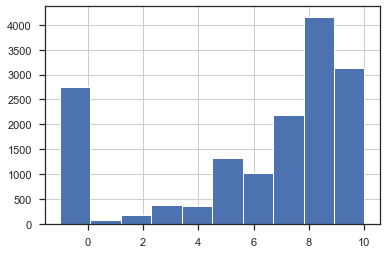

In [199]:
y_train.hist()

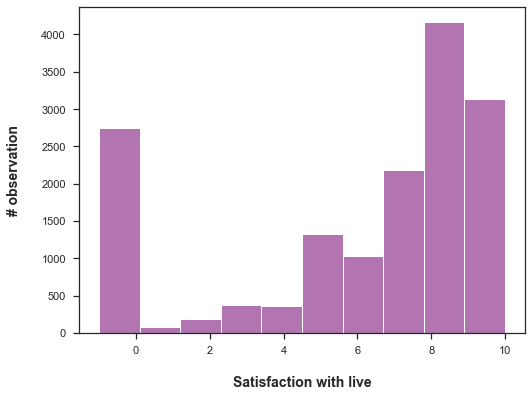

<Figure size 432x288 with 0 Axes>

In [200]:
# Create bars and choose color
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_facecolor("white")
ax.hist(y_train, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.xlabel('Satisfaction with live', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
plt.ylabel('# observation', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
ax.set_facecolor("white") ## white background
# Limits for the Y axis

# Create names
#plt.xticks([x for x in rang(-1,10)], [x for x in rang(-1,10)])
 
# Show graphic
plt.show()

plt.savefig('fig1.png', bbox_inches='tight') ## bbbox to not cut the labels

#### c)  Taylor (pipeline)

In [201]:
"""
for k in range(1,7):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True
    model = poly_model.fit(X_train, y_train)
    
    
    #print(poly_model.score(X_test, y_test))

    y_pred  = poly_model.predict(X_test)
    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
"""

'for k in range(1,7):\n    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True\n    model = poly_model.fit(X_train, y_train)\n    \n    \n    #print(poly_model.score(X_test, y_test))\n\n    y_pred  = poly_model.predict(X_test)\n    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))\n'

In [202]:
"""
Result with features pca all
1 12.639222470953477 -0.004191237106780044
2 13.596191359963083 -0.0802227948023353
...

Result with 20 columns of the pca
1 12.691280289024979 0.0005084332200716579
2 12.847189383387747 -0.011770062049994978
3 740.225607485154 -57.295872074920545
...

Result with 10 columns of the pca
1 12.79045153818512 -0.0007991417943655765
2 12.835876597887085 -0.004353462033175326
3 13.669013797103895 -0.0695429505734253
4 2918698854143.3833 -228375933378.8603
5 1.8400454397274128e+17 -1.4397583161502128e+16
"""

'\nResult with features pca all\n1 12.639222470953477 -0.004191237106780044\n2 13.596191359963083 -0.0802227948023353\n...\n\nResult with 20 columns of the pca\n1 12.691280289024979 0.0005084332200716579\n2 12.847189383387747 -0.011770062049994978\n3 740.225607485154 -57.295872074920545\n...\n\nResult with 10 columns of the pca\n1 12.79045153818512 -0.0007991417943655765\n2 12.835876597887085 -0.004353462033175326\n3 13.669013797103895 -0.0695429505734253\n4 2918698854143.3833 -228375933378.8603\n5 1.8400454397274128e+17 -1.4397583161502128e+16\n'

In [203]:
#mean_absolute_error(y_test, y_pred)

In [204]:
#mean_squared_error(y_test, y_pred)

In [205]:
#r2_score(y_test, y_pred)

#### c)  Regression Tree

In [206]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-1.0314582027570447

In [207]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [208]:
mean_absolute_error(y_test, y_pred)

3.817107629077832

In [209]:
mean_squared_error(y_test, y_pred)

25.964551759568455

In [210]:
r2_score(y_test, y_pred)


-1.0314582027570447

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [211]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [212]:
mean_absolute_error(y_test, y_pred)

3.2398321774124494

In [213]:
mean_squared_error(y_test, y_pred)

16.875303250849104

In [214]:
r2_score(y_test, y_pred)

-0.32031831438478897

# 3. optimize recursive feature elimination (RFE)

In [215]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [216]:
data = ds
XCol= columns #
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
#XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]

In [217]:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X,y)


selector.ranking_
#selector.support_

array([37,  1, 19, 11, 16,  1,  8, 17,  3, 33, 13,  5,  1, 14,  9,  4, 41,
       39, 38, 40,  1,  1, 28,  7, 27,  2, 34, 31, 25, 29, 15, 26, 18, 35,
       20, 30, 24, 12, 36,  6, 10, 32, 22, 23, 21])

In [218]:
rfe_col = []
for x in range(len(X.columns)):
    if selector.ranking_[x]<=2:
        rfe_col.append(X.columns[x])
print(len(rfe_col))
rfe_col

6


['PB150: SEX',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD080: Internet connection for personal use at home']

In [220]:
Y_lin = y
X_lin = X[rfe_col]
lm = LinearRegression()
model = lm.fit(X_lin,Y_lin)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X_lin)


Intercept:  6.25890637773676
Coef:  [-0.09839983 -0.09351356  0.07580998 -0.08135811 -0.15622778  0.05921037]


<Figure size 432x288 with 0 Axes>

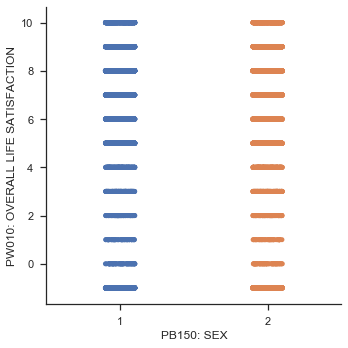

<Figure size 432x288 with 0 Axes>

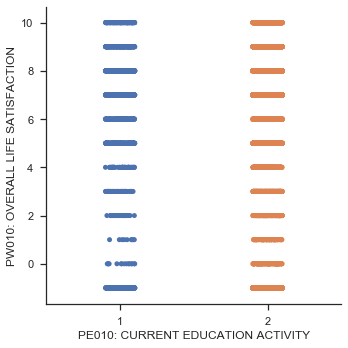

<Figure size 432x288 with 0 Axes>

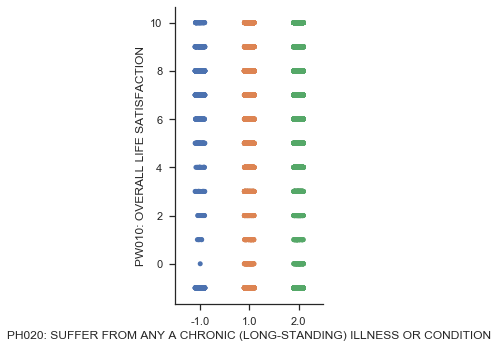

<Figure size 432x288 with 0 Axes>

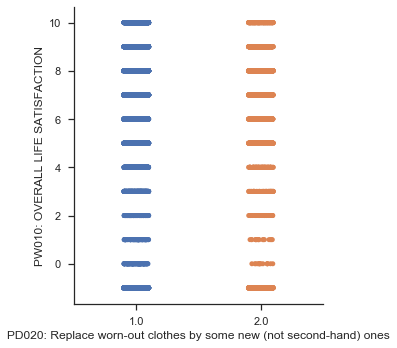

<Figure size 432x288 with 0 Axes>

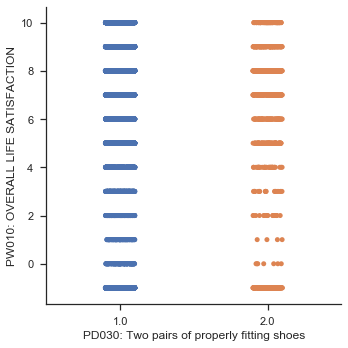

<Figure size 432x288 with 0 Axes>

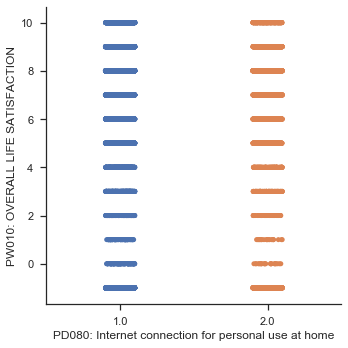

In [134]:
sns.set(style="ticks")
for x in rfe_col:
    plt.figure(figsize=(6,4))
    ax=sns.catplot(x=x, y ='PW010: OVERALL LIFE SATISFACTION', data=data)
    name =x[7:]+".png"
    ax.savefig(name)

## 2. Classification

### 2.1.1 prepare data

In [135]:
"""
### use raw data
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 
XCol.remove(outcomelist)
YCol=outcomelist
"""

"\n### use raw data\nXCol=list(data.columns) ## take all otherwise: columns\noutcomelist = 'PW010' ## \nXCol.remove(outcomelist)\nYCol=outcomelist\n"

In [136]:
## with features_ica
#X =data[XCol]
#y= data[YCol]

In [137]:

### use cleanded
data = ds
XCol= columns #
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
#XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]


In [223]:
## binning
data['Y_class']= data[YCol].apply(lambda x: 1 if x>5 else 0)

In [224]:

print(data['Y_class'].value_counts(normalize=True))
y=data['Y_class']
## --> balanced?

1    0.674459
0    0.325541
Name: Y_class, dtype: float64


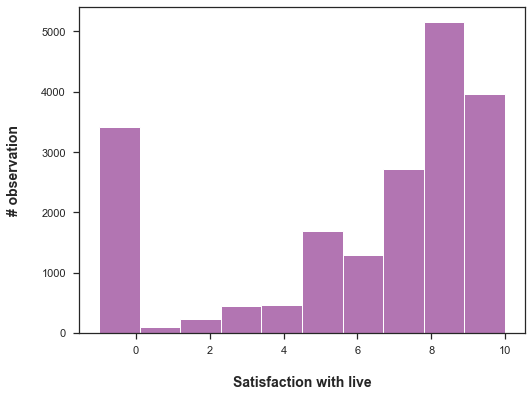

<Figure size 432x288 with 0 Axes>

In [222]:
# Create bars and choose color
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_facecolor("white")
ax.hist(y, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.xlabel('Satisfaction with live', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
plt.ylabel('# observation', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
ax.set_facecolor("white") ## white background
# Limits for the Y axis

# Create names
#plt.xticks([x for x in rang(-1,10)], [x for x in rang(-1,10)])
 
# Show graphic
plt.show()

plt.savefig('fig2.png', bbox_inches='tight') ## bbbox to not cut the labels

In [141]:
print(len(XCol))
print(YCol)

45
PW010: OVERALL LIFE SATISFACTION


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape


(15570, 45)

#### a) Logistic Regression

In [143]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [144]:
acc = lr.score(X_test,y_test)
acc

0.6804520935011559

In [145]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

#tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 68.05
precision: nan


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


array([[   0, 1244],
       [   0, 2649]], dtype=int64)

#### b) DecisionTree Classify

In [146]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', max_features= 29, splitter= 'best', random_state = 29)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

accuracy: 56.33
precision: 31.22
recall: 67.71


array([[ 379,  865],
       [ 835, 1814]], dtype=int64)

In [147]:

param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(1,30)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid, scoring='accuracy',  n_jobs=-1)#eed = True,
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced', 'max_features': 11, 'splitter': 'random'}

In [148]:
dtc = DecisionTreeClassifier(class_weight='balanced' ,max_features= 12, splitter= 'best', random_state = 29)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

accuracy: 57.13
precision: 33.09
recall: 68.59


array([[ 416,  828],
       [ 841, 1808]], dtype=int64)

In [150]:
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

In [164]:
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

,Satisfied,Not satisfied
True,1808,416
False,828,841


In [ ]:
## try with pca

In [ ]:
#data = ds
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
X = features_pca
y= data[YCol]

In [ ]:
## binning
data['Y_class']= data[YCol].apply(lambda x: 1 if x>5 else 0)
y=data['Y_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

In [ ]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', max_features= 29, splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

In [ ]:
param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(4,30)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid)
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

#### c) Support Vector Maschine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [ ]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

#### d) K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
acc = knn.score(X_test, y_test)*100
acc

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

Process	(backup)

•	Simbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning
